# Policy Gradient

## Basic Components
在一个强化学习系统中，通常包含Actor、Env和Reward Function这三个部分，其中我们控制着Actor的行为，而另外两部分并不受我们控制。

## Policy of Actor
* Policy使用$\pi$来表示一个网络，其参数为$\theta$  
    * 输入：机器观察到的图像，使用一个向量或矩阵进行表示  
    * 输出：每个动作对应输出层的一个神经单元  
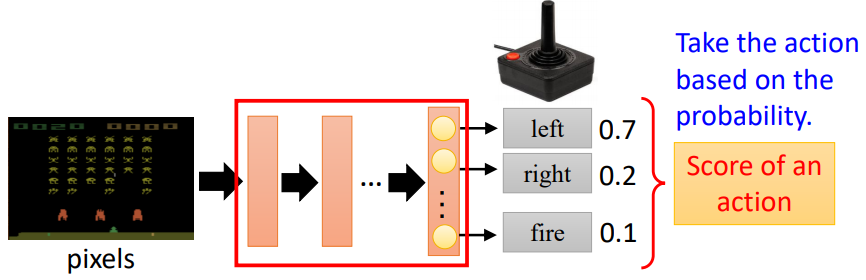
* 一个episode通常为{$s_1$,$a_1$,$r_1$,$s_2$,$a_2$,$r_2$,...,$s_T$,$a_T$,$r_T$}  
总的reward为$R = \sum_{t=1}^T r_t$，强化学习的学习目标就是最大化总的reward。
## Actor Environment Reward
定义一个episode为$\tau$={$s_1$,$a_1$,$s_2$,$a_2$,...,$s_T$,$a_T$}，参数为$\theta$时，获取这样的episode的概率为$p_{\theta}(\tau) = p(s_1)p_{\theta}(a_1|s_1)p(s_2|s_1,a_1)p_{\theta}(a_2|s_2)p(s_3|s_2,a_2)... = p(s_1)\prod_{t=1}^T p_{\theta}(a_t|s_t)p(s_{t+1}|s_t,a_t)$  
因此一个$\tau$对应的total reward为$R = \sum_{t=1}^T r_t$，则对应的expected reward为$\overline{R}_{\theta} = \sum_{\tau} R(\tau)p_{\theta}(\tau) = E_{\tau \sim p_{\theta}(\tau)}[R(\tau)]$  
## Policy Gradient
为了使用$\overline{R}_{\theta}$取得最大值，我们使用梯度上升算法来获取参数$\theta$，则需要对$\overline{R}_{\theta}$求微分，$\nabla \overline{R}_{\theta} = \sum_{\tau} R(\tau) \nabla p_{\theta}(\tau) = \sum_{\tau} R(\tau)p_{\theta}(\tau) \frac{\nabla p_{\theta}(\tau)}{p_{\theta}(\tau)} $  
则在上述的求微分式子中，$R(\tau)$是否可微对于结果并没有影响。  
由于$\nabla f(x) = f(x)\nabla logf(x)$
因此  
$\begin{equation}
\begin{aligned}
\nabla \overline{R}_{\theta} &= \sum_{\tau} R(\tau)p_{\theta}(\tau) \nabla logp_{\theta}(\tau) \\
&=E_{\tau \sim p_{\theta}(\tau)}[R(\tau)\nabla logp_{\theta}(\tau)] \approx \frac{1}{N}\sum_{n=1}^N R(\tau ^n) \nabla logp_{\theta}(\tau ^n)\\
&=\frac{1}{N}\sum_{n=1}^N \sum_{t=1}^{T_n} R(\tau ^n) \nabla logp_{\theta}(a^n_t|s^n_t)
\end{aligned}
\end{equation}$  
因此，强化学习的训练过程为：根据给定的$\theta$来进行数据的获取，获取n个$\tau$后，使用这部分数据来更新模型  
$$\theta \leftarrow \theta + \eta \nabla \overline{R}_{\theta}$$
$$\nabla \overline{R}_{\theta} = \frac{1}{N}\sum_{n=1}^N \sum_{t=1}^{T_n} R(\tau ^n) \nabla logp_{\theta}(a^n_t|s^n_t)$$  
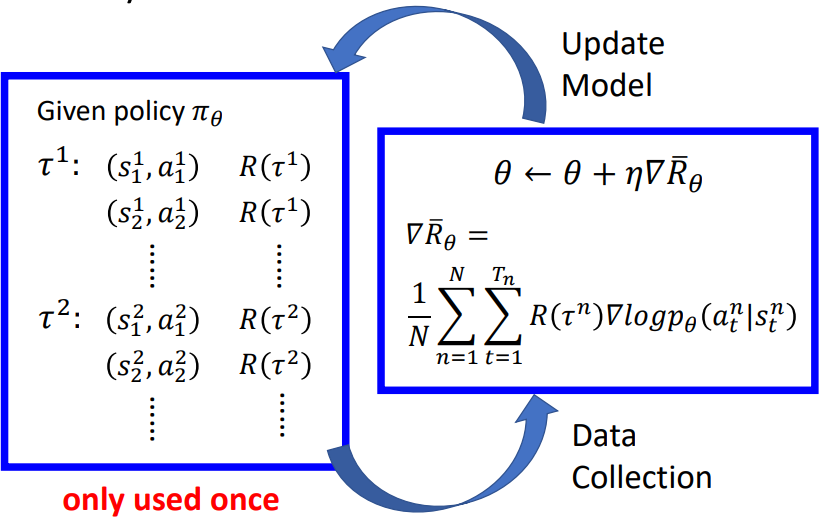
因此，在训练过程中每个梯度更新时的权重为当前$\tau$的总收益，而不是临时收益。
* Tips 1：add a baseline  
存在可能性为$R(\tau)$的值一直为正的，则每个Action采取的可能性都是一直在上升，如果采样的时候所有动作都被采用到，那么这属于理想情况，不会对训练结果有什么影响。但如果有某个动作采样的时候没有被采用到，而这个动作能获取的增益是由于其他被采样到的动作的话，那么其他动作可能性上升，相对来说该动作的可能性下降，这是不合理的。为了避免这种情况，我们给权重增加一个基线。
$$\theta \leftarrow \theta + \nabla \overline{R}_{\theta}$$
$$\nabla \overline{R}_{\theta} \approx \frac{1}{N}\sum_{n=1}^N \sum_{t=1}^{T_n} (R(\tau ^n)-b) \nabla logp_{\theta}(a^n_t|s^n_t)$$
$$b \approx E[R(\tau)]$$
* Tips 2:Assign Suitable Credit  
一般来说，我们认为模型当前采取的动作只会对后续的reward产生影响，对于之前的reward是没有影响。如果某个动作采取之后导致后续整体reward下降，而加上之前的reward使得该$\tau$的reward是正的，则这个动作采用的可能性也会上升，这样是不合理的，因此我们修改权重的表示。
$$\nabla \overline{R}_{\theta} \approx \frac{1}{N} \sum_{n=1}^N \sum_{t=1}^{T_n} (\sum_{t^{'}=t}^{T_n}\gamma ^{t^{'}-t}r^n_{t^{'}}-b) \nabla logp_{\theta}(a^n_t|s^n_t)$$